In [16]:
import pandas as pd
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv(r"C:\Users\sunda\Downloads\crop_production_data.csv")

In [23]:
# Step 2: Handle Missing Values
missing_values_before = df.isnull().sum()
print("Missing values before handling:", missing_values_before)
df['Production'] = df['Production'].fillna(df['Production'].mean())  # Fill missing values with the mean of the column


Missing values before handling: State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64


In [24]:
# Print missing values after handling
missing_values_after = df.isnull().sum()
print("Missing values after handling:", missing_values_after)


Missing values after handling: State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64


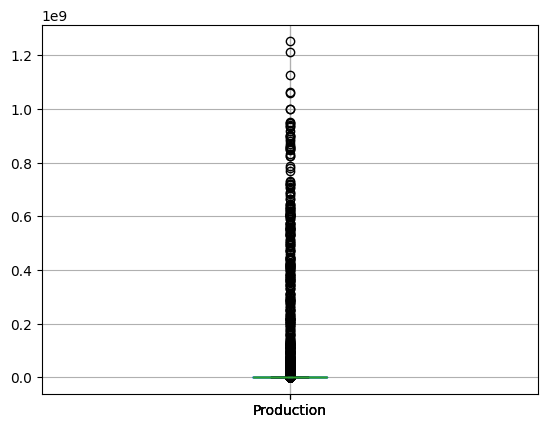

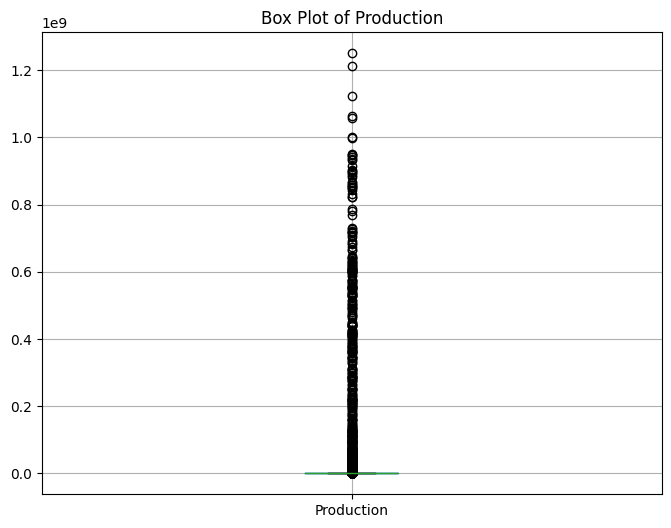

In [25]:
# Step 3: Handle Outliers
plt.figure(figsize=(8, 6))
df.boxplot(column=['Production'])
plt.title('Box Plot of Production')
plt.show()


In [26]:
df['Production'] = winsorize(df['Production'], limits=[0.05, 0.05])

In [27]:
# Step 4: Feature Engineering
df['Month'] = pd.to_datetime(df['Crop_Year'], format='%Y').dt.month
print("Unique months in the dataset:", df['Month'].unique())

Unique months in the dataset: [1]


In [28]:
# Step 5: Data Formatting
df['Crop_Year'] = pd.to_datetime(df['Crop_Year'], format='%Y')

In [29]:
# Step 6: Split Data into Training and Testing Sets
X = df.drop(columns=['Production'])
y = df['Production']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Print shapes of training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (196872, 7) (196872,)
Testing set shape: (49219, 7) (49219,)
